# Dependent and independent t-tests
#####    Practical assignment 3

This practical assignment need to be handed in on Brightspace before the deadline, 23:59 24/04/2020. Even though you are working in pairs, each student has to hand in their own assignment. Make sure that every cell is executed/compiled and renamed to 

**Assignment2_Surname1_Surname2.ipynb**

before submitting. For questions contact your TA during the workgroup, or via mail. You will get either a pass or fail for this assignment, depending on whether all questions are sufficiently answered (i.e. if enough effort has been put into this assignment)

**Name 1:** Erik Frohn - s1034685

**Name 2:** Evie de Leeuw - s1037585

### Dataset

Retirement homes are multi-residence housing facilities intended for the elderly, for a temporary or definitive stay. A problem for these elderly people is feeling lonely, and the need for interaction. This is where AI can help. Robot pets (i.e. a robot on the inside, stuffed animal on the outside) that react on touch, voice, and act on itself, can combat this loneliness (pets usually aren't allowed inside retirement homes).

In today's workgroup you will analyse data from a study interested in investigating the effectiveness of robot pets in combatting loneliness. In this study, the loneliness of elderly people was measured with a questionairre. Both at the start of the study (pre-test), and after spending 3 months with their robot pet (post-test). These questions were summarized into two loneliness scores for each individual (one pre and one post-test score). Elderly were randomly divided into two groups, one group who received a robot dog and another who received a robot cat.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats

sns.set_style("whitegrid")


from google.colab import files
uploaded = files.upload()

Saving Loneliness.csv to Loneliness.csv


In [7]:
lon_score = pd.read_csv("Loneliness.csv")
lon_score.keys()

Index(['Group', 'Lon_t1', 'Lon_t2'], dtype='object')

# Part 1

### <span style="color:red"> Question 1.1 </span>
First we are interested whether the robot pets affect loneliness. Describe a hypothesis that tests this. Is this a dependent or independent test?

lonDiff=Lon_t1-Lon_t2      
H0: lonDiff = 0      
Ha: lonDiff != 0      
this is an dependent test because the values from lon_t1 and lon_t2 come from the same people and their difference can be used as one value.

### <span style="color:red"> Question 1.2 </span>
Before doing a statistical test, it is always a good idea to have a look at your data. Choose an appropriate plot to visualize the data.

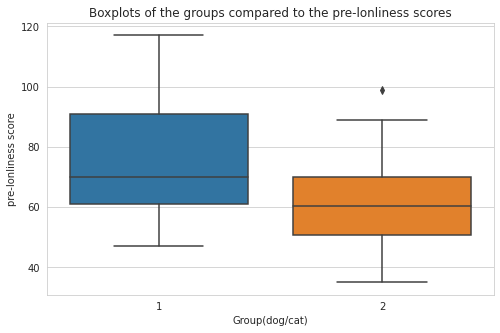

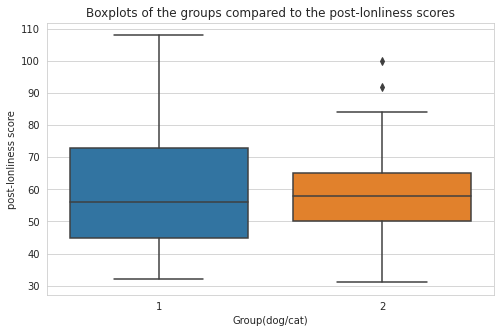

In [11]:
plt.figure(figsize=(8,5))
sns.boxplot(lon_score['Group'],lon_score['Lon_t1'])
plt.xlabel('Group(dog/cat)')
plt.ylabel('pre-lonliness score')
plt.title('Boxplots of the groups compared to the pre-lonliness scores')
plt.show()
plt.figure(figsize=(8,5))
sns.boxplot(lon_score['Group'],lon_score['Lon_t2'])
plt.xlabel('Group(dog/cat)')
plt.ylabel('post-lonliness score')
plt.title('Boxplots of the groups compared to the post-lonliness scores')
plt.show()

Before we can do a statistical test on the data, we will first create a list/array of all the differences of the scores before and after the treatment, such that $$x_{\Delta} = x_{t2}-x_{t1}$$

In [0]:
lon_diff = lon_score['Lon_t2']-lon_score['Lon_t1']

### <span style="color:red"> Question 1.2.2 </span>

Now that we have these scores we can do a t-test for Paired Data. First, let's calculate the mean,standard deviation, and the number of observations. Create a separate variable for each of these. 

In [14]:
#Mean of the difference of the lonliness scores
mean=0
nrOfObs = len(lon_diff)
for i in lon_diff:
    mean=mean+i
mean=mean/nrOfObs
print('Mean: '+str(mean))

#standard deviation of the difference of the lonliness scores
sd=0
for i in lon_diff:
    sd=sd+(i-mean)**2
sd=math.sqrt(sd/(nrOfObs-1))
print('Standard deviation: '+str(sd))

#number of observations in the data set
nrOfObs=len(lon_score)
print('Number of observations: '+str(nrOfObs))

Mean: -9.274725274725276
Standard deviation: 16.36871401591458
Number of observations: 91


### <span style="color:red"> Question 1.3 </span>
Now that we have these values, we can calculate the standard error (SE) and the T-value. Remember, the T-value looks a lot like the Z-value, where the Z-value relates to the normal distribution and the T-value to a t-distribution with a specific number of degrees of freedom.

First calculate the SE. Remember, the formula for the SE: $$SE_{\bar{x}_{diff}} = \dfrac{s_{diff}}{\sqrt{n_{diff}}}$$



In [15]:
SE=sd/math.sqrt(nrOfObs)
print('Standard error = '+str(SE))

Standard error = 1.7159074699520793


### <span style="color:red"> Question 1.4 </span>
Second, calculate the T-value. Remember, the formula for the T-value: $$T = \dfrac{\bar{x}_{diff} - \mu_{expected}}{SE_{\bar{x}_{diff}}}$$

In [16]:
T=(mean-0)/SE
print('T-value = '+str(T))

T-value = -5.4051430144915065


### <span style="color:red"> Question 1.5 </span>

Now that we got our T-value, we normally would look it up in a table, or use a function to calculate that for us. You can use the stats.t.sf function from the scipy toolbox, to compute the p-value for a given T-value and degrees of freedom. Consider whether you want to do a one-sided or a two-sided test. 


In [18]:
df=nrOfObs-1
pval = stats.t.sf(np.abs(T),df)*2
print(pval)

5.264906242767012e-07


### <span style="color:red"> Question 1.5.2 </span>
Finally, use the p-value and a signficance level of 0.05 to draw formulate a conclusion about the hypothesis you specified in question 1.1.

The pvalue is approximatly 0, this means that there is a chance of almost 0 that we get the same dataset if the null hypthesis were true. p<a (a=0.05). In this case we reject the null hypotheses and accept the alternative.

## Part 2

Now we have investigated whether the robots have a statistical impact on the loneliness, we're going to look at which robot performed better. The dog or the cat. For this we will look at the difference scores between the pre- and the post-test. Specifically, we will investigate whether the change in loneliness is between the pre-test and the post-test is different between the cats and dogs. 



### <span style="color:red"> Question 2.1 </span>

Specify the hypothesis for this test. Is this a dependent or independent test? 

H0: diffInDogsLon = diffInCatsLon      
Ha: diffInDogsLon != diffInCatsLon      
independent, because the success of the cats will not influence the success of the dogs and vice versa. The data is also not taken from the same set of people.

Before we go further, lets extract the datapoints that are relevant to us.

In [0]:
dogs = lon_diff[lon_score['Group'] == 1]
cats = lon_diff[lon_score['Group'] == 2]

### <span style="color:red"> Question 2.2 </span>
First, choose an appropriate plot to visualize the data. 

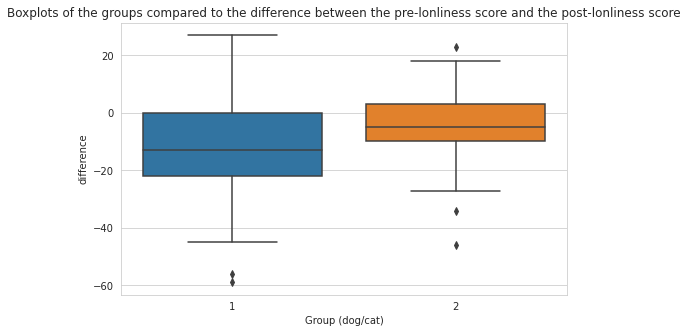

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(lon_score['Group'],lon_diff)
plt.xlabel('Group (dog/cat)')
plt.ylabel('difference')
plt.title('Boxplots of the groups compared to the difference between the pre-lonliness score and the post-lonliness score')
plt.show()

### <span style="color:red"> Question 2.3 </span>
Now compute the mean, standard deviation and number of observations in each group and store them in separate variables. 

In [23]:
#groupsize
nrGroup1=0
for i in lon_score['Group']:
    if((i==1)==True):
        nrGroup1=nrGroup1+1
nrGroup2=nrOfObs-nrGroup1
print('Group size of the dog group = '+str(nrGroup1))
print('Group size of the cat group = '+str(nrGroup2))


#Mean of the difference of the lonliness scores in Group 1
mean1=0
for i in dogs:
    mean1=mean1+i
mean1=mean1/nrGroup1
print('Mean of the dog group = '+str(mean1))

#Mean of the difference of the lonliness scores in Group 2
mean2=0
for i in cats:
    mean2=mean2+i
mean2=mean2/nrGroup2
print('Mean of the cat group = '+str(mean2))

#standard deviation of the difference of the lonliness scores in Group 1
sd1=0
for i in dogs:
    sd1=sd1+(i-mean1)**2
sd1=math.sqrt(sd1/(nrGroup1-1))
print('Standard deviation of the dog group = '+str(sd1))

#standard deviation of the difference of the lonliness scores in Group 2
sd2=0
for i in cats:
    sd2=sd2+(i-mean2)**2
sd2=math.sqrt(sd2/(nrGroup2-1))
print('Standard deviation of the cat group = '+str(sd2))

Group size of the dog group = 49
Group size of the cat group = 42
Mean of the dog group = -13.306122448979592
Mean of the cat group = -4.571428571428571
Standard deviation of the dog group = 17.793027756250314
Standard deviation of the cat group = 13.244682056865559


### <span style="color:red"> Question 2.4 </span>
Calculate the standard error (SE) of this modelled distribution. Since we take the sample difference of the means, the SE is calculated as follows:

$$SE_{\bar{x}_{group1} - \bar{x}_{group2}} = \sqrt{\dfrac{s^{2}_{group1}}{n_{group1}}+\dfrac{s^{2}_{group2}}{n_{group2}}}$$

In [24]:
SEdc=math.sqrt((sd1**2/nrGroup1)+(sd2**2/nrGroup2))
print('Standard error = '+str(SEdc))

Standard error = 3.261558327060479


### <span style="color:red"> Question 2.5 </span>

Calculate the t-statistic and the p-value. Keep in mind that we are using t-distribution of the sample difference of two means. 

In [26]:
Tdc=(mean1-mean2)/SEdc
dfdc=min(nrGroup1,nrGroup2)-1
pval = stats.t.sf(np.abs(Tdc),dfdc)*2
print(Tdc) 
print(pval)

-2.678073792236386
0.0106041104955054


### <span style="color:red"> Question 2.6 </span>
Finally, use the p-value and a signficance level of 0.05 to draw formulate a conclusion about the hypothesis you specified in question 2.1.

since p<a we reject the null hypotheses and accept the alternative.

## Part 3

In part 1 and 2 you implemented the independent and dependent tests yourself, but of course there are libraries that do this for you. Here we will use those libraries and compare those to our answers in part 1 and 2.

### <span style="color:red"> Question 3.1 </span>

Use `scipy.stats.ttest_rel(...)` ($\href{https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html}{documentation}$) to calculate the p-value of the paired t-test, and check whether this answer is the same as the one we calculated above. (**Note** `scipy.stats` has been imported as `stats`, so you can just use `stats.ttest_rel(...)`)

In [0]:
stats.ttest_rel(lon_score['Lon_t1'],lon_score['Lon_t2'])

Ttest_relResult(statistic=5.405143014491506, pvalue=5.264906242767031e-07)

### <span style="color:red"> Question 3.2 </span>

Use `scipy.stats.ttest_ind(...)` ($\href{https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html}{documentation}$) to calculate the p-value of the independent t-test, and check whether this answer is the same as the one we calculated above. (**Note** `scipy.stats` has been imported as `stats`, so you can just use `stats.ttest_ind(...)`)

In [0]:
stats.ttest_ind(dogs,cats)

Ttest_indResult(statistic=-2.6189686647554624, pvalue=0.0103668378408101)

There might be slight differences in the t-values and p-values you computed in questions 1/2 and question 3, due to subtle differences in the computation of the degrees of freedom and the SE.
